In [23]:
import datetime
import os
import gc
import numpy as np
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
image_root_dir = 'E:\LargeDatasets\SAR-Ocean-Images\GeoTIFF\OrganisationForModel'
train_dir = f'{image_root_dir}\\train'
val_dir = f'{image_root_dir}\\val'
test_dir = f'{image_root_dir}\\test'

In [20]:
batch_size = 8

train_generator = ImageDataGenerator().flow_from_directory(
        train_dir, class_mode = 'categorical', color_mode = 'grayscale',
        target_size=(540, 490), batch_size= batch_size)

val_generator = ImageDataGenerator().flow_from_directory(
        val_dir, class_mode = 'categorical', color_mode = 'grayscale',
        target_size=(540, 490), batch_size = batch_size)

test_generator = ImageDataGenerator().flow_from_directory(
        test_dir, class_mode = 'categorical', color_mode = 'grayscale',
        target_size=(540, 490), batch_size = batch_size, shuffle = False) 

Found 30041 images belonging to 10 classes.
Found 3756 images belonging to 10 classes.
Found 3756 images belonging to 10 classes.


In [5]:
image_path = 'E:\LargeDatasets\SAR-Ocean-Images\GeoTIFF\OrganisationForModel\\train\H\s1a-wv1-slc-vv-20160107t131721-20160107t131724-009388-00d975-029.tiff'
test_image = load_img(image_path, target_size = (540,490))

In [6]:
img_to_array(test_image)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [4]:
train_generator[0]

(array([[[[ 1768.],
          [ 1312.],
          [ 1548.],
          ...,
          [ 1449.],
          [ 2380.],
          [ 2262.]],
 
         [[ 6460.],
          [ 6486.],
          [ 5895.],
          ...,
          [ 5896.],
          [ 5949.],
          [ 6673.]],
 
         [[ 5505.],
          [ 5609.],
          [ 5209.],
          ...,
          [ 4021.],
          [ 5255.],
          [ 6507.]],
 
         ...,
 
         [[ 5963.],
          [ 5678.],
          [10339.],
          ...,
          [ 7489.],
          [ 6817.],
          [ 9932.]],
 
         [[ 5418.],
          [ 9668.],
          [ 9097.],
          ...,
          [ 8454.],
          [ 7058.],
          [ 6848.]],
 
         [[ 6423.],
          [ 7258.],
          [ 6422.],
          ...,
          [ 6535.],
          [ 5325.],
          [ 6115.]]],
 
 
        [[[ 4020.],
          [ 4623.],
          [ 3930.],
          ...,
          [ 4572.],
          [ 4174.],
          [ 4441.]],
 
         [[1362

In [6]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), activation='relu',
#                         input_shape=(540, 490, 1)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
# model.add(layers.Flatten())
# model.add(layers.Dense(1000, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

model = models.load_model('.\SavedModels\iterCNN')

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=.0001),
              metrics=['categorical_accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 538, 488, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 536, 486, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 268, 243, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 266, 241, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 264, 239, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 132, 120, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 130, 118, 256)     2

In [9]:
callbacks = [
    ModelCheckpoint(
        filepath='.\SavedModels\iterCNN',
        save_best_only=True,
        monitor="loss",
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='loss', 
        factor=0.1, 
        patience=3,
        min_delta=.01,
        cooldown = 3
    ),
    EarlyStopping(
    monitor="loss",
    min_delta=.01,
    patience=8,
    restore_best_weights=True
    )
]


In [10]:
history = model.fit(train_generator,
                        steps_per_epoch= 30041//batch_size,
                        epochs=16,
                        validation_data=val_generator,
                        validation_steps= 3756//batch_size,
                        callbacks = callbacks
                    )

Epoch 1/16
3755/3755 [==============================] - ETA: 0s - loss: 0.5797 - categorical_accuracy: 0.8026
Epoch 00001: loss improved from inf to 0.57967, saving model to .\SavedModels\iterCNN
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\SavedModels\iterCNN\assets
3755/3755 [==============================] - 1637s 436ms/step - loss: 0.5797 - categorical_accuracy: 0.8026 - val_loss: 0.6167 - val_categorical_accuracy: 0.7900
Epoch 2/16
3755/3755 [==============================] - ETA: 0s - loss: 0.5120 - categorical_accuracy: 0.8249
Epoch 00002: loss improved from 0.57967 to 0.51196, saving model to .\SavedModels\iterCNN
INFO:tensorflow:Assets written to: .\SavedModels\iterCNN\assets
3755/3755 [==============================] - 1636s 436ms/step - loss: 0.5120 - c

In [11]:
history.history

{'loss': [0.5796748399734497,
  0.5119628310203552,
  0.45132118463516235,
  0.42021360993385315,
  0.3664175271987915,
  0.3295261263847351,
  0.3036345839500427,
  0.2657826244831085,
  0.2337251454591751,
  0.20977185666561127,
  0.19340920448303223,
  0.18255536258220673,
  0.16760879755020142,
  0.1506403237581253,
  0.1315905600786209,
  0.11652768403291702],
 'categorical_accuracy': [0.8026171326637268,
  0.8248926401138306,
  0.8475343585014343,
  0.8572570085525513,
  0.8733060359954834,
  0.8864915370941162,
  0.8973795771598816,
  0.9095994234085083,
  0.9198548197746277,
  0.9290114045143127,
  0.936037003993988,
  0.9420637488365173,
  0.9451603293418884,
  0.9525855183601379,
  0.9584789872169495,
  0.9627742767333984],
 'val_loss': [0.6167066097259521,
  0.6498900055885315,
  0.4908738136291504,
  0.46852558851242065,
  0.6075376272201538,
  0.47934991121292114,
  0.5480213761329651,
  0.489112913608551,
  0.5276487469673157,
  0.5318435430526733,
  0.48858779668807983,


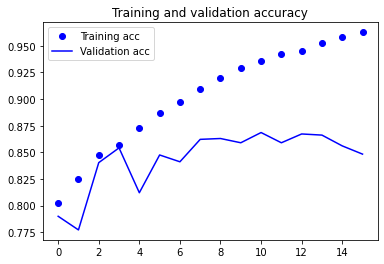

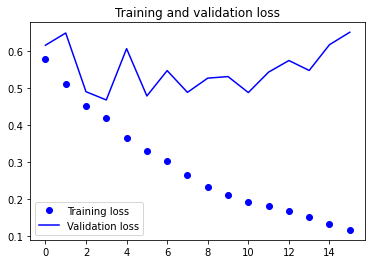

In [12]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
results = model.evaluate(test_generator)

470/470 [==============================] - 75s 159ms/step - loss: 0.6611 - categorical_accuracy: 0.8416


In [26]:
preds = np.argmax(model.predict(test_generator), axis = -1)

In [27]:
print(confusion_matrix(test_generator.classes,preds))

[[486   1   0   0   0   0   0   0   3   0]
 [  4 358  44   0   0   0   1   0  62  11]
 [  0   6 425   0   9   2   0   0  12   6]
 [  0   0   0 378   1  27  17  15  29   7]
 [  0   2  16   0 418  15   4   3   6   7]
 [  0   0   4   8  15 400   2   7   1   0]
 [ 11   0   0   2   0   9 163   1   8   4]
 [  0   0   0   9   2  47   0 156   2   0]
 [ 17   5   6  15   4  10   8   8 312  25]
 [  5   0   3   1   0   1   6   0  39  65]]


In [28]:
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes,preds,target_names = target_names))

              precision    recall  f1-score   support

           F       0.93      0.99      0.96       490
           G       0.96      0.75      0.84       480
           H       0.85      0.92      0.89       460
           I       0.92      0.80      0.85       474
           J       0.93      0.89      0.91       471
           K       0.78      0.92      0.84       437
           L       0.81      0.82      0.82       198
           M       0.82      0.72      0.77       216
           N       0.66      0.76      0.71       410
           O       0.52      0.54      0.53       120

    accuracy                           0.84      3756
   macro avg       0.82      0.81      0.81      3756
weighted avg       0.85      0.84      0.84      3756



In [5]:
def instantiate_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            input_shape=(540, 490, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [6]:
best_acc = 0
for i in range(36):
    model = instantiate_model()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=.0001),
              metrics=['acc'])
    history = model.fit(train_generator,
                        steps_per_epoch= 30041//batch_size,
                        epochs=1,
                        validation_data=val_generator,
                        validation_steps= 3756//batch_size,
                        verbose = 2)
    acc = history.history['acc'][-1]
    if best_acc < acc:
        best_acc = acc
        print(f'New best accuracy: {best_acc}')
        model.save('.\SavedModels\iterCNN', overwrite = True)
    del model
    del history
    tf.keras.backend.clear_session()
    for i in range (100):
        gc.collect()

6008/6008 - 1742s - loss: 2.2701 - acc: 0.1257 - val_loss: 2.2293 - val_acc: 0.1305
New best accuracy: 0.12571580708026886
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: .\SavedModels\iterCNN\assets
6008/6008 - 1753s - loss: 2.2670 - acc: 0.1302 - val_loss: 2.2303 - val_acc: 0.1278
New best accuracy: 0.13017712533473969
INFO:tensorflow:Assets written to: .\SavedModels\iterCNN\assets
6008/6008 - 1735s - loss: 2.2520 - acc: 0.1277 - val_loss: 2.2302 - val_acc: 0.1278
6008/6008 - 1733s - loss: 2.2573 - acc: 0.1234 - val_loss: 2.2306 - val_acc: 0.1305
6008/6008 - 1733s - loss: 2.2527 - acc: 0.1254 - val_loss: 2.2319 - val_acc: 0.1254
6008/6008 - 1737s - loss: 2.2578 - acc: 0.1273 - val_loss: 2.2318 - val_acc: 0.1278
6008/6008 - 1735s - loss: 2.2591 - acc: 0.1253 - val_los

KeyboardInterrupt: 